<a href="https://colab.research.google.com/github/Aniket7773/Signature-Verification-Model/blob/main/CNN_graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Define the root directory path
root_dir = "/content/drive/MyDrive/Colab Notebooks/sign_data/train"

# Initialize empty lists to store file paths and labels
file_paths = []
labels = []
image=[]
# Function to label images and append to lists
def label_images(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith((".png",".PNG")):  # Assuming your images are in PNG format
            image_path = os.path.join(directory, filename)
            #print(image_path)
            file_paths.append(image_path)
            labels.append(label)

# Traverse the directory structure and label images
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)

    if os.path.isdir(subdir_path):
        if subdir.endswith("_forg"):
            label = 0  # Forgery label
            #print(label)
        else:
            label = 1  # Genuine label

        image_dir = os.path.join(subdir_path)
        #image.append(image_dir)
        if os.path.exists(image_dir):
            image.append(image_dir)
            label_images(image_dir, label)

print(labels)
print(len(file_paths))
print((image))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

Epoch 1/10
42/42 [==============================] - 3251s 77s/step - loss: 0.7094 - accuracy: 0.5459 - val_loss: 0.6503 - val_accuracy: 0.6788
Epoch 2/10
42/42 [==============================] - 3218s 77s/step - loss: 0.6116 - accuracy: 0.6558 - val_loss: 0.9406 - val_accuracy: 0.5667
Epoch 3/10
42/42 [==============================] - 3212s 77s/step - loss: 0.3666 - accuracy: 0.8499 - val_loss: 0.1510 - val_accuracy: 0.9515
Epoch 4/10
42/42 [==============================] - 3222s 77s/step - loss: 0.1391 - accuracy: 0.9522 - val_loss: 0.1216 - val_accuracy: 0.9545
Epoch 5/10
42/42 [==============================] - 3236s 77s/step - loss: 0.1082 - accuracy: 0.9606 - val_loss: 0.2049 - val_accuracy: 0.9061
Epoch 6/10
42/42 [==============================] - 3167s 76s/step - loss: 0.0878 - accuracy: 0.9659 - val_loss: 0.0755 - val_accuracy: 0.9667
Epoch 7/10
42/42 [==============================] - 3207s 76s/step - loss: 0.0889 - accuracy: 0.9674 - val_loss: 0.0997 - val_accuracy: 0.9697

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


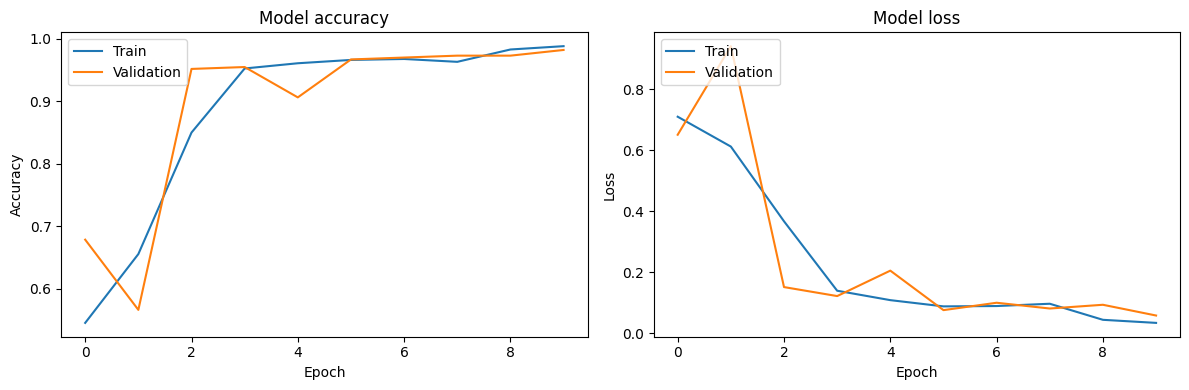

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Load and preprocess the images
def load_and_preprocess_image(file_path, label):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img, label

# Create a list of image data and labels
data = []
for file_path, label in zip(file_paths, labels):
    img, label = load_and_preprocess_image(file_path, label)
    data.append((img, label))

# Split data into training and validation sets
X, y = zip(*data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model and add the VGG16 base model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 1 output node for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert data to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust batch size as needed
    verbose=1
)
model.save('cnn-signature verification.h5')
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')


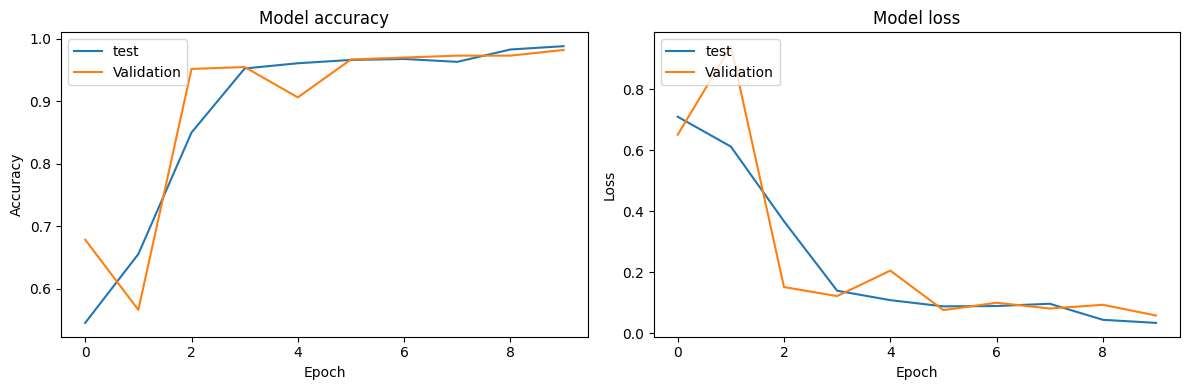

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['test', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['test', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Save the training history to a JSON file
import json
history_path = 'training_history.json'
with open(history_path, 'w') as json_file:
    json.dump(history.history, json_file)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
test_labels = []
test_file_paths = []
# Define the root directory path for test data
test_dir = "/content/drive/MyDrive/Colab Notebooks/sign_data/test"
model=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cnn-signature verification.h5')
# Function to label test images and append to lists
def label_test_images(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith((".png", ".PNG")):  # Check for both .png and .jpg extensions
            image_path = os.path.join(directory, filename)
            test_file_paths.append(image_path)
            test_labels.append(label)

# Traverse the directory structure and label test images
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)

    if os.path.isdir(subdir_path):
        if subdir.endswith("_forg"):
            label = 0  # Forgery label
        else:
            label = 1  # Genuine label

        label_test_images(subdir_path, label)
print(len(test_labels))

# Load and preprocess the images
def load_and_preprocess_image(file_path, label):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img, label


test_data = []
for file_path, label in zip(test_file_paths, test_labels):
    img, label = load_and_preprocess_image(file_path, label)
    test_data.append((img, label))

# Convert test data to NumPy arrays
X_test, y_test = zip(*test_data)
X_test = np.array(X_test)
y_test = np.array(y_test)





500


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming your model is trained, and you have a test set, X_test and y_test
# Make sure to preprocess the test data similarly to the training data

# Get the predicted probabilities for the positive class (e.g., genuine signatures)
y_pred_prob = model.predict(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the point on the ROC curve where FAR equals FRR (EER)
eer_threshold = thresholds[np.argmin(np.abs(fpr - (1 - tpr)))]

# Calculate EER, FAR, and FRR
eer = fpr[np.argmin(np.abs(fpr - (1 - tpr)))]
far_at_eer = fpr[np.argmin(np.abs(fpr - eer))]
frr_at_eer = 1 - tpr[np.argmin(np.abs(fpr - eer))]

print(f'AUC: {roc_auc:.4f}')
print(f'EER: {eer:.4f}')
print(f'FAR at EER: {far_at_eer:.8f}')
print(f'FRR at EER: {frr_at_eer:.8f}')


16/16 [==============================] - 294s 18s/step
AUC: 1.0000
EER: 0.0000
FAR at EER: 0.00000000
FRR at EER: 1.00000000


In [ ]:
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype(int)
# Calculate confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_binary, num_classes=2)

# Calculate FRR and FAR
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

FRR = FN / (TP + FN)
FAR = FP / (FP + TN)

print(f'False Rejection Rate (FRR): {FRR}')
print(f'False Acceptance Rate (FAR): {FAR}')

False Rejection Rate (FRR): 0.0
False Acceptance Rate (FAR): 0.008064516129032258


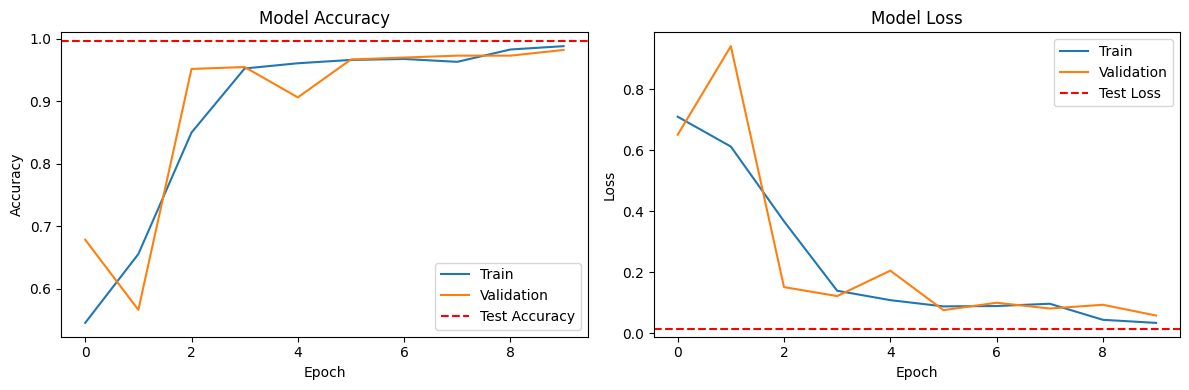

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

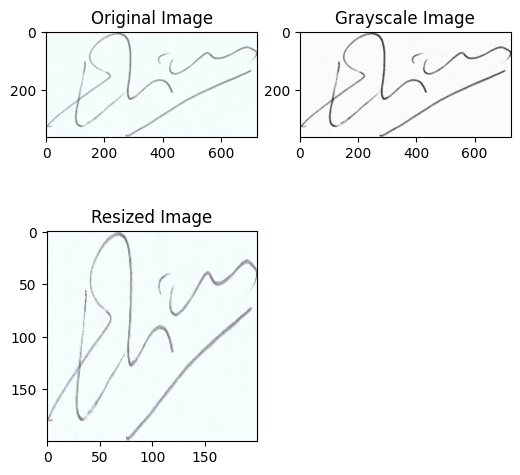

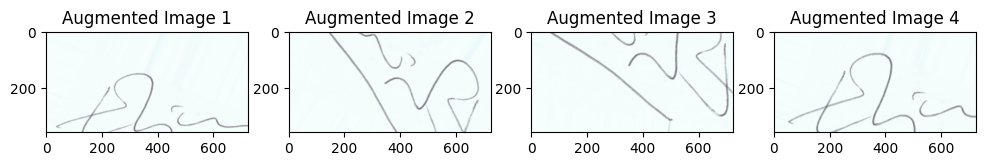

In [ ]:
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/sign_data/train/001/001_01.PNG"
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")

# Scaling
scale_factor = 2.0
scaled_image = cv2.resize(original_image_rgb, None, fx=scale_factor, fy=scale_factor)

# Display the scaled image
plt.subplot(2, 2, 2)
plt.imshow(scaled_image)
plt.title("Scaled Image")

# Resizing
new_size = (200, 200)
resized_image = cv2.resize(original_image_rgb, new_size)

# Display the resized image
plt.subplot(2, 2, 3)
plt.imshow(resized_image)
plt.title("Resized Image")

# Grayscale conversion
gray_image = cv2.cvtColor(original_image_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.savefig("gray.PNG")
plt.show()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Reshape image to (1, height, width, channels) for datagen.flow
img_for_augmentation = original_image_rgb.reshape((1,) + original_image_rgb.shape)

# Generate augmented images
augmented_images = [datagen.flow(img_for_augmentation).next()[0].astype(np.uint8) for i in range(4)]

# Display augmented images
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Augmented Image {i + 1}")
plt.show()



In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming your model is trained, and you have a test set, X_test and y_test
# Make sure to preprocess the test data similarly to the training data

# Get the predicted probabilities for the positive class (e.g., genuine signatures)
y_pred_prob = model.predict(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the point on the ROC curve where FAR equals FRR (EER)
eer_threshold = thresholds[np.argmin(np.abs(fpr - (1 - tpr)))]

# Calculate EER, FAR, and FRR
eer = fpr[np.argmin(np.abs(fpr - (1 - tpr)))]
far_at_eer = fpr[np.argmin(np.abs(fpr - eer))]
frr_at_eer = 1 - tpr[np.argmin(np.abs(fpr - eer))]

print(f'AUC: {roc_auc:.4f}')
print(f'EER: {eer:.4f}')
print(f'FAR at EER: {far_at_eer:.4f}')
print(f'FRR at EER: {frr_at_eer:.4f}')
